In [1]:
from actor_critic_highdim import Agent
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
agent = Agent(alpha=0.000005, beta=0.00001, input_dims=[2], gamma=0.99, n_actions=2, max_action=1)
env = gym.make('MountainCarContinuous-v0')


score_history = []
num_episodes = 50

for i in range(num_episodes):
    score = 0
    done = False
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        # print(action)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, reward, observation_, done)
        observation = observation_
        score += reward
    score_history.append(score)
    
    score_history.append(score)
    print('episode: ', i,'score: %.2f' % score)



episode:  0 score: -37.49
episode:  1 score: -29.30
episode:  2 score: -23.79
episode:  3 score: -18.85
episode:  4 score: -16.37
episode:  5 score: -13.82
episode:  6 score: -11.99
episode:  7 score: -10.94
episode:  8 score: -9.46
episode:  9 score: -8.81
episode:  10 score: -7.13
episode:  11 score: -5.65
episode:  12 score: -5.52
episode:  13 score: -4.62
episode:  14 score: -4.30
episode:  15 score: -3.93
episode:  16 score: -3.56
episode:  17 score: -3.31
episode:  18 score: -2.79
episode:  19 score: -2.60
episode:  20 score: -2.52
episode:  21 score: -2.10
episode:  22 score: -2.09
episode:  23 score: -2.03
episode:  24 score: -1.84
episode:  25 score: -1.66
episode:  26 score: -1.56
episode:  27 score: -1.25
episode:  28 score: -1.15
episode:  29 score: -1.02
episode:  30 score: -0.81
episode:  31 score: -0.76
episode:  32 score: -0.64
episode:  33 score: -0.63
episode:  34 score: -0.68
episode:  35 score: -0.55
episode:  36 score: -0.54
episode:  37 score: -0.50
episode:  38 s

Text(0.5, 1.0, 'Running average of previous 100 episodes')

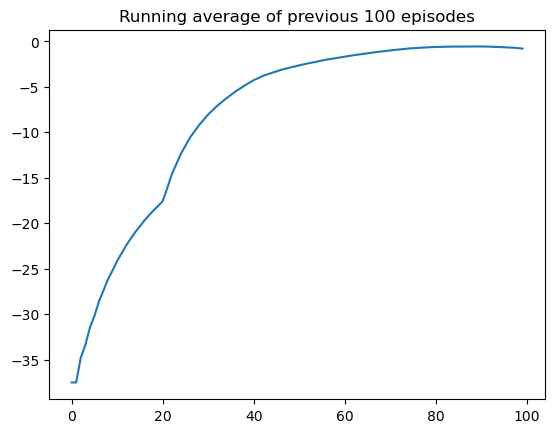

In [3]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-20):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')